# Is het verdamping?

In dit experiment is er een verwarmingselement in een met water gevulde maatbeker gestopt. Elke minuut is de temperatuur van het water gemeten. Deze metingen zijn opgeslagen in [tempmetingen.csv](tempmetingen.csv).

Verder is gegeven dat: 
$m_{maatbeker} = 820.8 \mathrm{gr}$  
$m_{maatbeker + water, start} = 1292.9 \mathrm{gr}$  
$m_{maatbeker + water, eind} = 1274.9 \mathrm{gr}$

Het moge duidelijk zijn dat er water is 'verdwenen'. Ook is de eindtemperatuur van het water niet gelijk aan een proces waarbij verdamping en eventuele warmteverliezen niet meegenomen worden. 

```{exercise}
Onderzoek het proces door:
1. De plot van de metingen te maken, inclusief een verwachte trendlijn voor de temperatuur van het water als al de toegevoerde warmte gaat zitten in het water.
2. Bepaal of de totale hoeveelheid toegevoegde energie correspondeert met de opwarming en verdamping van het water, geef daarbij de aannames die je doet.

aannames bij het maken van de trendlijn:
- We nemen aan dat P = 100, daar is verder geen experimentele basis voor
- We nemen de waardes van cwater en Lwater aan volgens de literatuurwaardes van het internet. 

3. Geef aanbevelingen voor een verbetering van het experiment om (nog) beter het thermodynamische proces te kunnen onderzoeken en beschrijven.

- In een vervolgexperiment zal het vermogen en de spanningstoevoer goed genoteerd moeten worden zodat die niet aangenomen hoeven te worden bij de berekening
- Het experiment zou vaker herhaald kunnen worden om zo de kans op random errors te verkleinen
- Er moet eerst bevestigd worden of we direct de waardes van cw en Lw kunnen nemen, de soortelijke warmte en verdampingswarmte van water moeten eerst experimenteel bepaald worden zodat die niet aangenomen hoeven te worden

- Er is een duidelijk verschil tussen de berekende warmteverlies en de toegevoerde warmte. Dit kan gecompenseerd worden door ook de warmteopname van het glaswerk en de omgeving mee te nemen in de berekening. Hiervoor zullen ook de soortelijke warmtes van het glaswerk experimenteel bepaald moeten worden
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

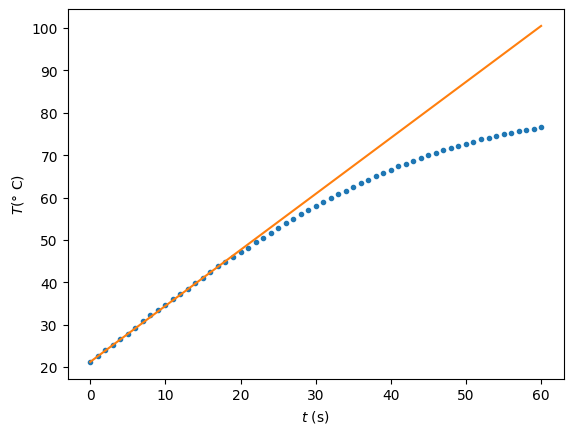

In [ ]:
# Opdracht 1

data = np.loadtxt('tempmetingen.csv', delimiter = ';', skiprows = 1)
t = data[:,0]
T = data[:,1]

#startmassa's, allebei in kilogram
mstart = (1292.9 - 820.8)*1e-3
mend = (1274.8 - 820.8)*1e-3

mvap = mstart - mend

#aannames:
P = 100  #W
cw = 4.18e3     #J/kgcelcius

#verwachte trend als alle toegevoerde warmte in het water gaat zitten:
# Dit is een omschrijving voor de formule die de soortelijke warmte van water uitdrukt
y = (P*t)/(cw*mvap)+T[0]


plt.figure()
plt.plot(t, T, '.')
plt.plot(t, y, '-')
plt.xlabel('$t$ (s)')
plt.ylabel(r'$T (\degree$ C)')
plt.show()

In [3]:
# Opdracht 2

Lw = 2.26e6     #J/kg

Qwarmwater = mstart * cw * (T[0] - T[-1])
Qevap = Lw * mvap

Qtot = Qwarmwater + Qevap

Qtoevoer = P * 60

print(f"De totale toegevoerde energie is {Qtoevoer:.5g} J en de hoeveelheid energie die kwijtraakt aan de opwarming en evaporatie van het water is {Qtot:.5g} J")

#De reele warmte is negatief aangezien het systeem warmte verliest



De totale toegevoerde energie is 6000 J en de hoeveelheid energie die kwijtraakt aan de opwarming en evaporatie van het water is -68419 J
